In [15]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import tensorflow as tf
import os
import json
from skimage import io
from pylab import rcParams

In [5]:
MODEL_PATH = '../data/model_plate/'
SAMPLES_PATHS = ['../data/plate_data_converted/']

In [7]:
def LoadImage(fname):
    return io.imread(fname)[:,:] / 255.

def LoadAnnotation(fname):
    with open(fname) as data_file:    
        data = json.load(data_file)
    
    print(fname)

    if len(data["objects"]) > 0:
        left = data["objects"][0]["points"]["exterior"][0][0]
        top = data["objects"][0]["points"]["exterior"][0][1]
        right = data["objects"][0]["points"]["exterior"][1][0]
        bottom = data["objects"][0]["points"]["exterior"][1][1]
    else:
        left = 0.0
        top = 0.0
        right = 0.0
        bottom = 0.0
        
#     print(type(left))
    
   
           
    return [left, top, right, bottom]

In [8]:
def ReadDirFiles(dname):
    paths = []
    for file in os.listdir(os.path.join(dname, "img")):
        bname = os.path.basename(file).split(".")[0]
        
        img_name = os.path.join(dname, "img", file)
        ann_name = os.path.join(dname, "ann", bname + ".json")
        paths.append((img_name, ann_name))
    return paths

def ReadPaths(paths):
    all_paths = []
    for path in paths:
        temp_paths = ReadDirFiles(path)
        all_paths.extend(temp_paths)
    return all_paths

def get_tags(fname):
    with open(fname) as data_file:
        data = json.load(data_file)
    tags = data["tags"]
    return tags

In [9]:
def train_test_split(paths, train_tag="train", test_tag="test"):
    train_paths = []
    test_paths = []
    for path in paths:
        img_path, ann_path = path
        tags = get_tags(ann_path)
        if train_tag in tags:
            train_paths.append(path)
        if test_tag in tags:
            test_paths.append(path)
    return train_paths, test_paths

In [10]:
all_paths = ReadPaths(SAMPLES_PATHS)
tr_paths, te_paths = train_test_split(all_paths)

print(len(tr_paths))
print(len(te_paths))

474
12


In [11]:
def LoadData(paths):
    xs = []
    ys = []
    for ex_paths in paths:
        img_path = ex_paths[0]
        ann_path = ex_paths[1]
        xs.append(LoadImage(img_path))
        ys.append(LoadAnnotation(ann_path))
    
    return np.array(xs), np.array(ys)

In [12]:
X_train, Y_train = LoadData(tr_paths)
X_test, Y_test = LoadData(te_paths)

print("check shapes:")
print("X_train - ", X_train.shape)
print("Y_train - ", Y_train.shape)
print("X_test - ", X_test.shape)
print("Y_test - ", Y_test.shape)

../data/plate_data_converted/ann/77.json
../data/plate_data_converted/ann/116.json
../data/plate_data_converted/ann/112.json
../data/plate_data_converted/ann/316.json
../data/plate_data_converted/ann/324.json
../data/plate_data_converted/ann/56.json
../data/plate_data_converted/ann/43.json
../data/plate_data_converted/ann/207.json
../data/plate_data_converted/ann/426.json
../data/plate_data_converted/ann/89.json
../data/plate_data_converted/ann/119.json
../data/plate_data_converted/ann/138.json
../data/plate_data_converted/ann/463.json
../data/plate_data_converted/ann/471.json
../data/plate_data_converted/ann/244.json
../data/plate_data_converted/ann/416.json
../data/plate_data_converted/ann/290.json
../data/plate_data_converted/ann/104.json
../data/plate_data_converted/ann/412.json
../data/plate_data_converted/ann/161.json
../data/plate_data_converted/ann/15.json
../data/plate_data_converted/ann/135.json
../data/plate_data_converted/ann/443.json
../data/plate_data_converted/ann/32.jso

../data/plate_data_converted/ann/50.json
../data/plate_data_converted/ann/232.json
../data/plate_data_converted/ann/38.json
../data/plate_data_converted/ann/91.json
../data/plate_data_converted/ann/175.json
../data/plate_data_converted/ann/193.json
../data/plate_data_converted/ann/440.json
../data/plate_data_converted/ann/94.json
../data/plate_data_converted/ann/257.json
../data/plate_data_converted/ann/450.json
../data/plate_data_converted/ann/419.json
../data/plate_data_converted/ann/237.json
../data/plate_data_converted/ann/301.json
../data/plate_data_converted/ann/355.json
../data/plate_data_converted/ann/427.json
../data/plate_data_converted/ann/196.json
../data/plate_data_converted/ann/425.json
../data/plate_data_converted/ann/201.json
../data/plate_data_converted/ann/394.json
../data/plate_data_converted/ann/286.json
../data/plate_data_converted/ann/259.json
../data/plate_data_converted/ann/445.json
../data/plate_data_converted/ann/456.json
../data/plate_data_converted/ann/414.j

../data/plate_data_converted/ann/178.json
../data/plate_data_converted/ann/202.json
../data/plate_data_converted/ann/384.json
../data/plate_data_converted/ann/423.json
../data/plate_data_converted/ann/424.json
../data/plate_data_converted/ann/315.json
../data/plate_data_converted/ann/230.json
../data/plate_data_converted/ann/156.json
../data/plate_data_converted/ann/366.json
../data/plate_data_converted/ann/80.json
../data/plate_data_converted/ann/120.json
../data/plate_data_converted/ann/101.json
../data/plate_data_converted/ann/88.json
../data/plate_data_converted/ann/272.json
../data/plate_data_converted/ann/383.json
../data/plate_data_converted/ann/354.json
../data/plate_data_converted/ann/224.json
../data/plate_data_converted/ann/307.json
../data/plate_data_converted/ann/90.json
../data/plate_data_converted/ann/313.json
../data/plate_data_converted/ann/280.json
../data/plate_data_converted/ann/99.json
../data/plate_data_converted/ann/436.json
../data/plate_data_converted/ann/59.js

In [13]:
img_sz = X_train.shape[1]

<Figure size 1008x576 with 0 Axes>

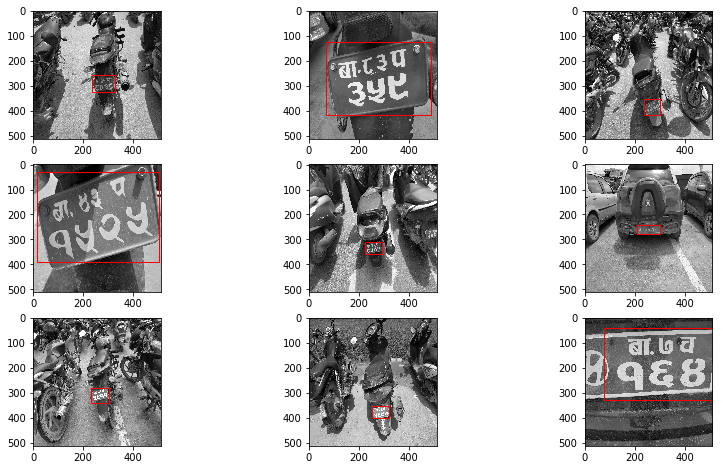

In [16]:
def show_image(image, labels, img_sz):
    rect = Rectangle((labels[0]*img_sz-(labels[2]*img_sz)/2, labels[1]*img_sz-(labels[3]*img_sz)/2), labels[2]*img_sz, labels[3]*img_sz, edgecolor='r', fill=False)
    plt.imshow(image)
    gca = plt.gca()
    gca.add_patch(rect)
    
def plot_images(images, labels, img_sz):
    rcParams['figure.figsize'] = 14, 8
    plt.gray()
    fig = plt.figure()
    for i in range(min(9, images.shape[0])):
#     for i in range(100):
        fig.add_subplot(3, 3, i+1)
        show_image(images[i], labels[i], img_sz)
    plt.show()    
    
xs = [random.randint(0, X_train.shape[0]-1) for _ in range(100)]                   
plot_images(X_train[xs], Y_train[xs], img_sz)  

In [17]:
g = tf.Graph()
with g.as_default():
    session = tf.InteractiveSession()
    model = build_model()
    saver = tf.train.Saver()
    saver.restore(session, os.path.join(MODEL_PATH, "model"))
    ids = [random.randint(0, X2_test.shape[0]-1) for _ in range(9)]
    predictions = model.output.eval(session=session, feed_dict={model.x_placeholder: X2_test[ids]})
#     plot_images(X_test[ids], (predictions+1) * (64, 32, 64, 32))
    plot_images(X_test[ids], predictions, img_sz)
    session.close()

NameError: name 'build_model' is not defined